#MGT-483 Optimal Decision Making 2024: Group Project
In traditional linear programming (LP), the goal is to find an optimal solution of a given optimization model with known input parameters. Inverse optimization (IO), on the other hand, seeks an optimization model that explains a given optimal decision, thereby reversing the conventional optimization process. IO has applications in various fields such as economics, engineering, and operations research and thus plays an important role in decision-making processes. For example, if past decisions of an economic agent are observable, IO allows us to learn this agent's decision model. This model may then allow us to predict future decisions of the agent, which could impact our own decision problem. Therefore, understanding and advancing IO techniques may help us to improve decision-making processes across diverse application domains.

This project is based on the paper [1], [which is available from here](https://arxiv.org/pdf/1511.04650.pdf) or from the [Management Science Webpage](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2017.2992).

As a concrete example, consider the following situation. You are the manager of a manufacturing company entering a new market. The company aims to manufacture various products using a numer of raw materials. Your job is to negotiate the prices of these raw materials with the supplier. For this negotiation it would be helpful to know the prices that the supplier has offered to your competitor. Needless to say that your competitor has no interest in helping you by revealing this information. However, you may be able to estimate the prices offered to your competitor by using inverse optimization. To this end, assume that you know the production process used by your competitor. Assume also that you know the maximum amounts of the raw materials that can be ordered from the supplier over one planning cycle. This information allows you to construct the feasible set of the competitor's optimization problem (which is a manufacturing problem, that is, a linear program). Unfortunately, you do not know the competitor's objective function because it depends on the unknown prices for the raw materials. Fortunately, however, public companies are legally required to publish sales data, that is, you can observe your competitor's optimal production decisions. As we will see in this project, observing the optimal solution of a linear program with an unknown objective function allows us to construct an estimator for the objective function coefficients. Using this estimator, you can then (approximately) reconstruct the prices your competitor had to pay to the supplier for the raw materials. Now you are well prepared to enter negotiations with the supplier!

Now let's start from the basics about how to find the objective function coefficients using inverse optimization.

## 1 Inverse Linear Programming: Formulation [20 points]
Assume as ususal that $\mathbf{x} \in \mathbb{R}^n$, $\mathbf{c} \in \mathbb{R}^n$, $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^m$.  We define the *linear programming* problem as:
$$
\begin{alignedat}{2}
\mathbf{LP}(\mathbf{c}): & \quad \underset{\mathbf{x}}{\text{minimize}} && \quad \mathbf{c}^\top\mathbf{x} \\
& \quad \text{subject to} && \quad \mathbf{A}\mathbf{x} \ge \mathbf{b}.
\end{alignedat}
$$
In the following we assume that $\mathbf{A}$ and $\mathbf{b}$ are known. However, we are not given the cost vector $\mathbf{c}$. Instead, we have access to a decision $\mathbf{x}^0 \in \mathbb{R}^n$, which is known to be an optimal or a near-optimal solution of $\mathbf{LP}(\mathbf{c})$. Inverse optimization aims to determine a vector $\mathbf c$ that explains the observed decision $\mathbf x^0$. More precisely, given $\mathbf{A}$, $\mathbf{b}$ and $\mathbf{x}^0$, inverse optimzation seeks a $\mathbf c$ that makes $\mathbf{x}^0$ optimal in $\mathbf{LP}(\mathbf{c})$. Note that if $\mathbf c=\mathbf 0$, then every feasible solution of $\mathbf{LP}(\mathbf{c})$ is optimal. Thus, it makes sense to search for a normalized cost vector that satisfies $\|\mathbf{c}\|_1 = 1$. This specification gives rise to the following *inverse optimization* problem.
<!-- In the data-driven regime, it is possible that the observed decision $\mathbf x^0$ is not an exact optimal solution but an approximate one due to data noise. Thus we denote by $\mathbf x^0$ as the observed solution. We consider $\mathbf{A}$, $\mathbf{b}$ and $\mathbf{x}^0$ to be given; thus, they form the *data* that we use to infer the cost vector $\mathbf{c}$. We start with what we refer to as the classical *inverse* optimization problem, which finds a cost vector $\mathbf{c}$ such that $\mathbf{x}^0$ is optimal for $\mathbf{IP}(\mathbf{c})$: -->
$$
\begin{alignedat}{2}
\mathbf{IO}(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c}}{\text{minimize}} && \quad 0 \\
& \quad \text{subject to} && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \mathbf{b}^\top\mathbf{y} \\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$

### 1.1 Interpretation of $\mathbf{IO}(\mathbf{x}^0)$ [10 points]
Show that if $(\mathbf y^*, \mathbf c^*)$ is an optimal solution of $\mathbf{IO}(\mathbf{x}^0)$ and if $\mathbf x^0$ is feasible (that is, $\mathbf{A}\mathbf{x}^0 \ge \mathbf{b}$), then $\mathbf x^0$ is an optimal solution of $\mathbf{LP}(\mathbf{c}^*)$. *Hint:* Use the weak duality theorem.
<!-- Can you explain why one would formuate the inverse problem as $\mathbf{IO}(\mathbf{x^0})$ (including the objective, limitations, and decision variables). Show that $\mathbf{c}$ obtained by solving $\mathbf{IO}(\mathbf{x^0})$  is optimal for $\mathbf{IP}(\mathbf{c})$? -->

<font color="green">Your answer:</font>

The dual of $\mathbf{LP}(\mathbf{c^{*}})$ would be:
$$
\begin{alignedat}{2}
\mathbf{dual}: & \quad \underset{\mathbf{y}}{\text{maximize}} && \quad \mathbf{b}^\top\mathbf{y} \\
& \quad \text{subject to} && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c^{*}} \\
& \quad && \quad \mathbf{y} \ge \mathbf{0}.
\end{alignedat}
$$

If $(\mathbf{y^{*}}, \mathbf{c^{*}})$ is optimal for $\mathbf{IO}(\mathbf{x}^0)$, then it also satisfies the condition $\mathbf{c}^\top\mathbf{x}^0 = \mathbf{b}^\top \mathbf{y}$. Using this fact, together with the weak duality theorem, it is possible to conclude in the following manner. \\
First: take $\mathbf{y^{*}}$ (which is dual feasible) and $\mathbf{x}$ (another primal feasible solution) and apply the weak duality theorem: $\mathbf{(c^{*})}^\top\mathbf{x} \ge \mathbf{b}^\top \mathbf{y^{*}}$. \\
Second, use the satisfied condition $\mathbf{(c^{*})}^\top\mathbf{x}^0 = \mathbf{b}^\top \mathbf{y^{*}}$, obtaining: $\mathbf{(c^{*})}^\top\mathbf{x}^0 = \mathbf{b}^\top \mathbf{y^{*}} \le \mathbf{(c^{*})}^\top\mathbf{x}$. \\
Since $\mathbf{LP}(\mathbf{c^{*}})$ is a minimization problem, the optimality of $\mathbf{x}^0$ follows from the above statement.

### 1.2 Infeasibility of $\mathbf{IO}(\mathbf{x}^0)$ [10 points]
Explain why $\mathbf{IO}(\mathbf{x}^0)$ fails to be a linear program. Show that if we know in advance that $\mathbf c \geq \mathbf 0$, however, then $\mathbf{IO}(\mathbf{x}^0)$ simplifies to a linear program. Solve $\mathbf{IO}(\mathbf{x}^0)$ using CVXPY for the $\mathbf A$, $\mathbf b$ and $\mathbf x^0$ given below. Report the result. Is $\mathbf{IO}(\mathbf{x}^0)$ feasible? If not, why not?

In [35]:
# Import packages.
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Data
A = np.array([[2, 5],
              [2, -3],
              [2, 1],
              [-2, -1]])
b = np.array([10, -6, 4, -10])
x0 = np.array([2.5, 3])

In [36]:
# Define variables, objective, and constraints
y = cp.Variable(4)
c = cp.Variable(2)

# Solve the problem
objective_1_1_2 = 0

# Define the constraints
constraints_1_1_2 = [A.T@y == c, c.T@x0 == b.T@y, sum(c) == 1, y >= 0, c >= 0]

# Specify and solve the problem
prob_1_1_2 = cp.Problem(cp.Minimize(objective_1_1_2), constraints_1_1_2)
prob_1_1_2.solve()

# Print the result if you want
print("\nThe optimal y value is", y.value)
print("\nThe optimal c value is", c.value)


The optimal y value is None

The optimal c value is None


In [37]:
print("The problem is :", prob_1_1_2.status)

The problem is : infeasible


In [38]:
# check
prob_1_1_2.solve()

inf

<font color="green">Your answer:</font>

$\mathbf{IO}(\mathbf{x}^0)$ fails to be a linear program because of the presence of the non-linear condition $||\mathbf{c}||_1 = 1$. \\
If we know in advance that $\mathbf{c} \geq \mathbf{0}$, then $||\mathbf{c}||_1 = 1$ simplifies to $c_1 + c_2 = 1$, which is a linear condition. \\
In general, $\mathbf{IO}(\mathbf{x}^0)$ can always be reduced to a linear problem if the 1-norm condition is rewritten as above, with the additional sign constraints on the elements of $\mathbf{c}$: ($c_1 \leq 0, c_2 \leq 0)$, etc. (4 possibilities in total).

As can be seen above, the problem is infeasible. Indeed, no solutions for $(\mathbf{y}, \mathbf{c})$ could be found, <font color="red">which means that the feasible set is unbounded and thus that the problem is infeasible (?)</font>.

## 2 Generalized Inverse Linear Optimization [15 points]
We have seen that even if $\mathbf x^0$ is a feasible solution for the linear programming problem, it is possible that the inverse optimization problem $\mathbf{IO}(\mathbf{x}^0)$ is infeasible. This can happen when $\mathbf x^0$ is not an exact optimizer of the linear programming problem but a noisy observation of an exact optimizer. We thus introduce the following generalized formulation of the inverse optimization problem.
$$
\begin{alignedat}{2}
\textbf{GIO}(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\boldsymbol{\epsilon}}{\text{minimize}} && \quad {\|\boldsymbol{\epsilon}\|_p} \\
&\quad\text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c}\\
& && \quad \mathbf{c}^\top(\mathbf{x}^0 - \boldsymbol{\epsilon}) = \mathbf{b}^\top\mathbf{y}\\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$
Here, the new auxiliary decision vector $\boldsymbol \epsilon$ captures the observation noise. The problem aims to find a cost vector $\mathbf c$ for which the de-noised decision $\mathbf x^0-\boldsymbol \epsilon$ is optimal in $\mathbf{LP}(\mathbf c)$, while keeping the noise as small as possible with
respect to the $p$-norm for some $p\geq 1$. This alternative model is guaranteed to be feasible. However, this problem still involves two non-linear constraints: $\mathbf{c}^\top(\mathbf{x}^0 - \boldsymbol{\epsilon}) = \mathbf{b}^\top\mathbf{y}$ and $\|\mathbf{c}\|_1 = 1$. It remains unclear how to solve the problem directly.

### 2.1 Closed-form Solution
Luckily, problem $\mathbf{GIO}(\mathbf x^0)$ admits a closed-form solution. In Reference [1], you will find the following theorem.


#### Theorem 1.
Given $\mathbf{x}^0$ such that $\mathbf{A}\mathbf{x}^0\geq \mathbf b$, where $\mathbf{A}$ is a full-rank matrix, an optimal solution to $\mathbf{GIO}(\mathbf{x}^0)$ is given by
$$
\begin{equation}
(\mathbf y^*,\mathbf c^*,\boldsymbol \epsilon^*) = \left(\frac{\mathbf{e}_{i^*}}{\|\mathbf{a}_{i^*}\|_1},\frac{\mathbf{a}_{i^*}}{\|\mathbf{a}_{i^*}\|_1},\frac{\mathbf{a}_{i^*}^\top \mathbf{x}^0-b_{i^*}}{\|\mathbf{a}_{i^*}\|_q}\mathbf{v}^*\right)
\end{equation},
$$
where $\mathbf{a}_i$ defines the $i$-th row of $\mathbf{A}$, $\mathbf{e}_i$ is the $i$-th standard basis vector whose entries are all 0 except for the $i$-th component, which equals 1. In addition, $q$ satisfies $1/p+1/q=1$, where $p$ defines the error norm in $\mathbf{GIO}(\mathbf{x}^0)$, while
$$i^*\in \underset{i\in 1,...,m}{\text{argmin}}\{(\mathbf{a}^\top_i\mathbf{x}^0-b_i)/\|\mathbf{a}_i\|_q\}  \quad \text{and}\quad \mathbf{v}^*\in \underset{\|\mathbf{v}\|_p=1}{\text{argmin}}\ \mathbf{a}^\top_{i^*}\mathbf{v}.$$
Furthermore, the optimal objective value of $\mathbf{GIO}(\mathbf{x}^0)$ is $\ \|\boldsymbol{\epsilon}^*\|_p=(\mathbf{a}^\top_{i^*}\mathbf{x}^0-b_{i^*})/\|\mathbf{a}_{i^*}\|_q.$

### 2.2 Interpretation of $\mathbf{GIO}(\mathbf{x}^0)$ [15 points]

Assume that $p=1$. Solve $\mathbf{GIO}(\mathbf{x}^0)$ using Theorem 1 for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ that you used in Section 1.2. Denote the resulting optimal cost vector by $\hat{\mathbf{c}}$.

Next, solve $\mathbf{LP}(\hat{\mathbf{c}})$ with CVXPY. Compare the resulting optimizer with $\mathbf x^0$, and compare the resulting optimal value with $\hat{\mathbf c}^\top \mathbf x^0$. Solve the same question again under the assumption that $p=\infty$.

In [39]:
# solve GIO(x0)

# p = 1
row_norms = np.linalg.norm(A, ord=np.inf, axis=1)

# objective i
result = A @ x0 - b

for i in range(len(A)):
    result[i] /= row_norms[i]

i = np.argmin(result)
#print(result, i)

c_hat = A[i]/np.linalg.norm(A[i], ord=1) # computes the 2-norm, not 1-norm, need to specify ord=1

print("\nThe optimal c value is", c_hat)


The optimal c value is [ 0.4 -0.6]


In [40]:
# solve LP(c_hat)
x = cp.Variable(2)

# Define the objective function
objective_2_2 = c_hat.T@x

# Define the constraints
constraints_2_2 = [A@x >= b]

# Specify and solve the problem
prob_2_2 = cp.Problem(cp.Minimize(objective_2_2), constraints_2_2)
prob_2_2.solve()

-1.1999999976459024

In [41]:
# compare/print
print("\nThe optimal value for x is", x.value)
print("The value for x0 is", x0)
print("The optimal cost with c_hat and the optimal x is", prob_2_2.value)
print("The optimal cost with c_hat and x0 is", c_hat.T@x0)


The optimal value for x is [1.16990525 2.77993683]
The value for x0 is [2.5 3. ]
The optimal cost with c_hat and the optimal x is -1.1999999976459024
The optimal cost with c_hat and x0 is -0.7999999999999999


In [42]:
# same but with p = infty

row_norms = np.linalg.norm(A, ord=1, axis=1)

# objective i
result = A @ x0 - b

for i in range(len(A)):
    result[i] /= row_norms[i]

i = np.argmin(result)
# print(result, i)

c_hat = A[i]/np.linalg.norm(A[i], ord=1) # need to specify ord=inf

print("\nThe optimal c value is", c_hat)



The optimal c value is [ 0.4 -0.6]


In [43]:
# solve LP(c_hat)
x = cp.Variable(2)

# Define the objective function
objective_2_2 = c_hat.T@x

# Define the constraints
constraints_2_2 = [A@x >= b]

# Specify and solve the problem
prob_2_2 = cp.Problem(cp.Minimize(objective_2_2), constraints_2_2)
prob_2_2.solve()

-1.1999999976459024

In [44]:
# compare/print
print("\nThe optimal value for x is", x.value)
print("The value for x0 is", x0)
print("The optimal cost with c_hat and the optimal x is", prob_2_2.value)
print("The optimal cost with c_hat and x0 is", c_hat.T@x0)


The optimal value for x is [1.16990525 2.77993683]
The value for x0 is [2.5 3. ]
The optimal cost with c_hat and the optimal x is -1.1999999976459024
The optimal cost with c_hat and x0 is -0.7999999999999999


## 3 Absolute and Relative Duality Gaps [35 points]
Problem $\textbf{GIO}_a(\mathbf{x}^0)$ guarantees feasibility by adding a perturbation to $\mathbf x^0$. However, the resulting problem is not a linear program. One can also formulate an alternative generalized inverse optimization model that allows for a non-vanishing duality gap as shown below.
$$
\begin{alignedat}{2}
\textbf{GIO}_a(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_a}{\text{minimize}} && \quad \epsilon_a \\
 & \quad\text{subject to} && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \mathbf{b}^\top\mathbf{y}+\epsilon_a \\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$
Here, the new auxiliary variable $\epsilon_a$ captures indeed the absolute duality gap, which we aim to minimize. Note that problem $\textbf{GIO}_a(\mathbf{x}^0)$ is again guaranteed to be feasible and reduces to a linear program when we add the constraint $\mathbf c\geq \mathbf 0$.

### 3.1 Interpretation of $\mathbf{GIO}_a(\mathbf{x}^0)$ [20 points]

Solve problem $\mathbf{GIO}_a(\mathbf{x}^0)$ using CVXPY for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ as in Section 1.2, and assume that $\mathbf{c}\geq \mathbf 0$. Denote the optimal cost vector by $\hat{\mathbf{c}}$. Solve $\mathbf{LP}(\hat{\mathbf{c}})$ and compare the resulting optimal solution with $\mathbf x^0$, and compare its optimal value with $\hat{\mathbf c}^\top \mathbf x^0$.

In [45]:
# solve GIO_a(x0)

# Define the decision variables
y = cp.Variable(4)
c = cp.Variable(2)
e_a = cp.Variable()

# Define the objective function
objective_3_1_1 = e_a

# Define the constraints
constraints_3_1_1 = [A.T@y == c, c.T@x0 == b.T@y + e_a, sum(c) == 1, y >= 0, c >= 0]

# Specify and solve the problem
prob_3_1_1 = cp.Problem(cp.Minimize(objective_3_1_1), constraints_3_1_1)
prob_3_1_1.solve()

# Save optimal cost vector
c_hat = c.value

In [46]:
# solve LP(c_hat)

# Define the decision variables
x = cp.Variable(2)

# Define the objective function
objective_3_1_2 = c_hat.T@x

# Define the constraints
constraints_3_1_2 = [A@x >= b]

# Specify and solve the problem
prob_3_1_2 = cp.Problem(cp.Minimize(objective_3_1_2), constraints_3_1_2)
prob_3_1_2.solve()



1.3333333348650553

In [47]:
# compare/ print

# Print the solution for 3.1 first part:
print("\nThe optimal value for εₐ is", prob_3_1_1.value)
print("The optimal value for y is", y.value)
print("The optimal value for c_hat is", c.value)

# Print the solution for 3.1 second part:
print("\nThe optimal value for x is", x.value)
print("The value for x0 is", x0)
print("The optimal cost with c_hat and the optimal x is", prob_3_1_2.value)
print("The optimal cost with c_hat and x0 is", c_hat.T@x0)


The optimal value for εₐ is 1.333333331495018
The optimal value for y is [ 1.85464147e-10 -2.51207318e-10  3.33333333e-01 -1.87431516e-10]
The optimal value for c_hat is [0.66666667 0.33333333]

The optimal value for x is [0.91741046 2.16517907]
The value for x0 is [2.5 3. ]
The optimal cost with c_hat and the optimal x is 1.3333333348650553
The optimal cost with c_hat and x0 is 2.6666666672488883


Comment: As visible in the printed results above, the optimal value for $\mathbf x$ as a solution to $\mathbf{LP}(\hat{\mathbf{c}})$ differs significantly from the value for $\mathbf x^0$. The optimal cost of $\mathbf{LP}(\hat{\mathbf{c}})$ with the optimal solution $\mathbf x$ is approximately half as high as $\hat{\mathbf c}^\top \mathbf x^0$.

Solve problem $\mathbf{GIO}_a(\mathbf{x}^0)$ again using CVXPY for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ as in Section 1.2. This time, however, do not assume that $\mathbf{c}\geq \mathbf 0$. In this case, $\mathbf{GIO}_a(\mathbf{x}^0)$ is not a linear program. Show that $\mathbf{GIO}_a(\mathbf{x}^0)$ can be solved by solving four different linear programs, one for each facet of the 1-norm unit ball, such that the optimal value of $\mathbf{GIO}_a(\mathbf{x}^0)$ coincides with the smallest of the optimal values of the four linear programs. The four linear programs can be obtained by restricting the signs of all coordinates of the 2-dimensional vector $\mathbf{c}$.

Denote the optimal cost vector by $\hat{\mathbf{c}}$. Solve $\mathbf{LP}(\hat{\mathbf{c}})$. Compare the resulting optimal solution with $\mathbf x^0$, and compare its optimal value with $\hat{\mathbf c}^\top \mathbf x^0$.

In [48]:
# solve GIO_a(X0)

# --------------------- Case 1: c1 >= 0, c2 >=0 ------------------------

# already solved above

# Save optimal cost for case 1
e_a_case1 = prob_3_1_1.value

# Save optimal cost vector for case 1
c_hat_case1 = c_hat

# --------------------- Case 2: c1 <= 0, c2 >=0 ------------------------

# Define the decision variables
y = cp.Variable(4)
c = cp.Variable(2)
e_a = cp.Variable()

# Define the objective function
objective_3_1_3 = e_a

# Define the constraints
constraints_3_1_3 = [A.T@y == c, c.T@x0 == b.T@y + e_a, -c[0] + c[1] == 1, y >= 0, c[0] <= 0, c[1] >= 0]

# Specify and solve the problem
prob_3_1_3 = cp.Problem(cp.Minimize(objective_3_1_3), constraints_3_1_3)
prob_3_1_3.solve()

# Save optimal cost for case 2
e_a_case2 = prob_3_1_3.value

# Save optimal cost vector for case 2
c_hat_case2 = c.value

# --------------------- Case 3: c1 >= 0, c2 <=0 ------------------------

# Define the decision variables
y = cp.Variable(4)
c = cp.Variable(2)
e_a = cp.Variable()

# Define the objective function
objective_3_1_4 = e_a

# Define the constraints
constraints_3_1_4 = [A.T@y == c, c.T@x0 == b.T@y + e_a, c[0] - c[1] == 1, y >= 0, c[0] >= 0, c[1] <= 0]

# Specify and solve the problem
prob_3_1_4 = cp.Problem(cp.Minimize(objective_3_1_4), constraints_3_1_4)
prob_3_1_4.solve()

# Save optimal cost for case 3
e_a_case3 = prob_3_1_4.value

# Save optimal cost vector for case 3
c_hat_case3 = c.value

# --------------------- Case 4: c1 <= 0, c2 <=0 ------------------------

# Define the decision variables
y = cp.Variable(4)
c = cp.Variable(2)
e_a = cp.Variable()

# Define the objective function
objective_3_1_5 = e_a

# Define the constraints
constraints_3_1_5 = [A.T@y == c, c.T@x0 == b.T@y + e_a, -c[0] - c[1] == 1, y >= 0, c[0] <= 0, c[1] <= 0]

# Specify and solve the problem
prob_3_1_5 = cp.Problem(cp.Minimize(objective_3_1_5), constraints_3_1_5)
prob_3_1_5.solve()

# Save optimal cost for case 4
e_a_case4 = prob_3_1_5.value

# Save optimal cost vector for case 4
c_hat_case4 = c.value

# Print
print("\nOptimal cost (εₐ) in case 1 is", e_a_case1)
print("\nOptimal cost (εₐ) in case 2 is", e_a_case2)
print("\nOptimal cost (εₐ) in case 3 is", e_a_case3)
print("\nOptimal cost (εₐ) in case 4 is", e_a_case4)

print("\nThe overall minimum cost (εₐ) is", min(e_a_case1, e_a_case2, e_a_case3, e_a_case4))

# Save optimal cost vector
c_hat = c_hat_case3


Optimal cost (εₐ) in case 1 is 1.333333331495018

Optimal cost (εₐ) in case 2 is 2.4999999967957214

Optimal cost (εₐ) in case 3 is 0.3999999990146196

Optimal cost (εₐ) in case 4 is 0.6666666660165487

The overall minimum cost (εₐ) is 0.3999999990146196


In [49]:
# solve LP(c)

# Define the decision variables
x = cp.Variable(2)

# Define the objective function
objective_3_1_6 = c_hat.T@x

# Define the constraints
constraints_3_1_6 = [A@x >= b]

# Specify and solve the problem
prob_3_1_6 = cp.Problem(cp.Minimize(objective_3_1_6), constraints_3_1_6)
prob_3_1_6.solve()

-1.199999999157022

In [50]:
# compare/print

# Print the values:
print("\nThe optimal value for x is", x.value)
print("The value for x0 is", x0)
print("The optimal cost with c_hat and the optimal x is", prob_3_1_6.value)
print("The optimal cost with c_hat and x0 is", c_hat.T@x0)


The optimal value for x is [1.17238219 2.78158812]
The value for x0 is [2.5 3. ]
The optimal cost with c_hat and the optimal x is -1.199999999157022
The optimal cost with c_hat and x0 is -0.8000000030744573


If we do not assum that $\mathbf{c}\geq \mathbf 0$, $\mathbf{GIO}_a(\mathbf{x}^0)$ is not a linear program because of the presence of the non-linear condition $||\mathbf{c}||_1 = 1$. This, however, can be solved by solving four different linear programs, one for each facet of the 1-norm unit ball. For this, we only need to consider every possible sign combination of the coordinates of the 2-dimensional vector $\mathbf{c}$. Each possible sign combination can be seen in the code cells above (4 in total). Since $\mathbf{GIO}_a(\mathbf{x}^0)$ is a minimization problem, the optimal value is the smallest of all four optimal values.

As visible in the printed results above, the smallest of all four optimal values is the one from case 3 where $\mathbf{c(1)}\geq \mathbf 0, \mathbf{c(2)}\leq \mathbf 0$. Therefore, the optimal $\hat{\mathbf{c}}$ is the optimal $\mathbf c$ from solving case 3.

The optimal value for $\mathbf x$ as a solution to $\mathbf{LP}(\hat{\mathbf{c}})$ still differs from the value for $\mathbf x^0$. The optimal cost of $\mathbf{LP}(\hat{\mathbf{c}})$ with the optimal solution $\mathbf x$ also differs significantly from $\hat{\mathbf c}^\top \mathbf x^0$. Both costs are negative which is permitted since there are no sign restrictions in $\mathbf{LP}(\mathbf{c})$.

### 3.2 Relative Duality Gap [15 points]

Instead of minimizing the absolute duality gap, we can also formulate in inverse optimization problem that minimizes the relative duality gap as shown below.
$$
\begin{alignedat}{2}
\textbf{GIO}_r(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_r}{\text{minimize}} && \quad |\epsilon_r - 1| \\
&\quad \text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\mathbf{y} \\
& && \quad \|\mathbf{c}\|_1 = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$

### Reformulation of $\textbf{GIO}_r(\mathbf{x}^0)$
Explain why problem $\mathbf{GIO}_r(\mathbf{x}^0)$ fails to be a linear program even if we include the constraint $\mathbf c\geq \mathbf 0$. Show that the optimal solution of problem $\mathbf{GIO}_r(\mathbf{x}^0)$ can be obtained from the optimal solution of the following problem by rescaling.
$$
\begin{alignedat}{2}
\textbf{GIO}_{r}'(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_r}{\text{minimize}} && \quad |\epsilon_r - 1| \\
&\quad \text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\mathbf{y} \\
& && \quad |\mathbf{b}^\top\mathbf{y}| = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$
Show that $\textbf{GIO}_{r}'(\mathbf{x}^0)$ can be sovled by solving two separate linear programs corresponding to $\mathbf{b}^\top \mathbf{y}=+1$ and $\mathbf{b}^\top \mathbf{y}=-1$.

<font color="green">Your answer:</font>

$\mathbf{GIO}_r(\mathbf{x}^0)$ fails to be a linear program due to the right hand side in the second constraint. $\mathbf{ϵ_r}$ and $\mathbf{y}$ are both decision variables multipyling each other. This introduces a non-linearity into the problem even if we include the constraint $\mathbf{c}\geq \mathbf 0$.

To show that the optimal solution of the problem $\mathbf{GIO}_r(\mathbf{x}^0)$ can be obtained from the optimal solution of problem $\textbf{GIO}_{r}'(\mathbf{x}^0)$ by rescaling, let us look at the second constraint $\mathbf{c}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\mathbf{y}$. We can scale this entire line by a positive scalar $\lambda$, with $\lambda > 0$. This would lead to the following constraint: $\tilde{\mathbf{c}}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\tilde{\mathbf{y}}$, which is identical to the previous constraint apart from the scaling factor. We can then translate the constraint on $\mathbf{c}$ (captured in the third constraint $\|\mathbf{c}\|_1 = 1$) to a constraint on $\mathbf{b}^\top\tilde{\mathbf{y}}$. Using the knowledge that $\mathbf{y} \ge \mathbf{0}$, we can set the constraint $|\mathbf{b}^\top\tilde{\mathbf{y}}| = 1$. By renaming $\tilde{\mathbf{y}}$ to $\mathbf{y}$ and $\tilde{\mathbf{c}}$ to $\mathbf{c}$, we arrive at the second problem formulation. Thus, $\textbf{GIO}_{r}'(\mathbf{x}^0)$ is a scaled version of $\mathbf{GIO}_r(\mathbf{x}^0)$ and the optimal solution of $\mathbf{GIO}_r(\mathbf{x}^0)$ can be obtained from the optimal solution of $\textbf{GIO}_{r}'(\mathbf{x}^0)$ by rescaling.

$\textbf{GIO}_{r}'(\mathbf{x}^0)$ can now be solved by solving two separate linear programs since we make a case differentiation for $\mathbf{b}^\top \mathbf{y}$: The only two cases that fulfill the constraint $|\mathbf{b}^\top\mathbf{y}| = 1$ are $\mathbf{b}^\top \mathbf{y}=+1$ and $\mathbf{b}^\top \mathbf{y}=-1$. In the case $\mathbf{b}^\top \mathbf{y}=+1$, the second constraint simplifies to $\mathbf{c}^\top\mathbf{x}^0 = \epsilon_r$. In the case $\mathbf{b}^\top \mathbf{y}=-1$, the second constraint simplifies to $\mathbf{c}^\top\mathbf{x}^0 = -\epsilon_r$. Both programs are then linear programs and can be solved as known.

Since $\textbf{GIO}_{r}'(\mathbf{x}^0)$ is a minimization problem, the optimal value is the smallest of the two optimal values resulting from the two separate linear programs.


Solve problem $\mathbf{GIO}_r(\mathbf{x}^0)$ using CVXPY for the same data $\mathbf{A}$, $\mathbf{b}$ and $\mathbf x^0$ as in Section 1.2. Denote the optimal cost vector by $\hat{\mathbf{c}}$. Solve $\mathbf{LP}(\hat{\mathbf{c}})$. Compare the resulting optimal solution with $\mathbf x^0$, and compare its optimal value with $\hat{\mathbf c}^\top \mathbf x^0$.  Note that you do not need to assume that $\mathbf{c}\geq \mathbf 0$. Is $\frac{\mathbf{x}^0}{\epsilon_r}$ feasible or optimal in $\mathbf{LP(\hat{c})}$? Please explain why it is feasible or optimal.

In [51]:
# solve GIO_r

# --------------------- Case 1: b.T@y = +1 ------------------------

# Define the decision variables
y = cp.Variable(4)
c = cp.Variable(2)
e_r = cp.Variable()

# Define the objective function
objective_3_2_1 = cp.abs(e_r - 1)


# Define the constraints
constraints_3_2_1 = [A.T@y == c, c.T@x0 == e_r, b.T@y == 1, y >= 0]

# Specify and solve the problem
prob_3_2_1 = cp.Problem(cp.Minimize(objective_3_2_1), constraints_3_2_1)
prob_3_2_1.solve()

# Save optimal cost for case 1
cost_case1 = prob_3_2_1.value

# Save optimal cost vector for case 1
c_hat_r_case1 = c.value

# --------------------- Case 2: b.T@y = -1 ------------------------

# Define the decision variables
y = cp.Variable(4)
c = cp.Variable(2)
e_r = cp.Variable()

# Define the objective function
objective_3_2_2 = cp.abs(e_r - 1)

# Define the constraints
constraints_3_2_2 = [A.T@y == c, c.T@x0 == -e_r, b.T@y == -1, y >= 0]

# Specify and solve the problem
prob_3_2_2 = cp.Problem(cp.Minimize(objective_3_2_2), constraints_3_2_2)
prob_3_2_2.solve()

# Save optimal cost for case 2
cost_case2 = prob_3_2_2.value

# Save optimal cost vector for case 2
c_hat_r_case2 = c.value

# print the results
print("\nThe optimal cost for case 1 is", prob_3_2_1.value)
print("\nThe optimal cost for case 2 is", prob_3_2_2.value)



The optimal cost for case 1 is 0.9999999930713166

The optimal cost for case 2 is 0.19999999938114565


In [52]:
# solve LP(c_hat)

# Define the decision variables
x = cp.Variable(2)

# Define the objective function
objective_3_2_3 = c_hat_r_case2.T@x

# Define the constraints
constraints_3_2_3 = [A@x >= b]

# Specify and solve the problem
prob_3_2_3 = cp.Problem(cp.Minimize(objective_3_2_3), constraints_3_2_3)
prob_3_2_3.solve()

-0.999999995114934

In [53]:
# compare/ check feasibility and optimality/ print

# Print the values:
print("\nThe optimal value for x is", x.value)
print("The value for x0 is", x0)
print("The optimal cost with c_hat_r_case2 and the optimal x is", prob_3_2_3.value)
print("The optimal cost with c_hat_r_case2 and x0 is", c_hat_r_case2.T@x0)

# Check feasibility and optimality:
print("\nThe optimal value for εᵣ is", e_r.value)

test_x = x0/e_r.value

print("The value for x0 / εᵣ is", test_x)
print("The cost with c_hat_r_case2 and x0 / εᵣ is", c_hat_r_case2.T@test_x)


The optimal value for x is [3.41050102 3.17899796]
The value for x0 is [2.5 3. ]
The optimal cost with c_hat_r_case2 and the optimal x is -0.999999995114934
The optimal cost with c_hat_r_case2 and x0 is -0.8000000006188515

The optimal value for εᵣ is 0.8000000006188543
The value for x0 / εᵣ is [3.125 3.75 ]
The cost with c_hat_r_case2 and x0 / εᵣ is -0.9999999999999964


<font color="green">Your answer:</font>

As visible in the printed results above, the smallest of the two optimal values is the one from case 2 where $\mathbf{b}^\top \mathbf{y}=-1$. Therefore, the optimal $\hat{\mathbf{c}}$ is the optimal $\mathbf c$ from solving case 2.

The optimal value for $\mathbf x$ as a solution to $\mathbf{LP}(\hat{\mathbf{c}})$ still differs from the value for $\mathbf x^0$. The optimal cost of $\mathbf{LP}(\hat{\mathbf{c}})$ with the optimal solution $\mathbf x$ also still differs from $\hat{\mathbf c}^\top \mathbf x^0$, however the discrepancy could be reduced. Both costs are negative which is permitted since there are no sign restrictions in $\mathbf{LP}(\mathbf{c})$.

To answer the question if $\frac{\mathbf{x}^0}{\epsilon_r}$ is feasible or optimal in $\mathbf{LP}(\hat{\mathbf{c}})$, we need to analyze the actual optimal value for $\epsilon_r$. As printed above, the optimal value for $\epsilon_r = 0.8000000001243947$. Since $\mathbf{x}^0$ is also known we can calculate the value of $\frac{\mathbf{x}^0}{\epsilon_r}$ (see print cell above). We know that $\mathbf{x}^0$ is a feasible and optimal (or near-optimal) solution to $\mathbf{LP}(\mathbf{c})$. $\mathbf{LP}(\hat{\mathbf{c}})$ differs from $\mathbf{LP}(\mathbf{c})$ only through a different cost vector $\mathbf{c}$, the constraints (i.e. $\mathbf{A}$ and $\mathbf{b}$) are identical. Therefore, $\mathbf{x}^0$ is also feasible in $\mathbf{LP}(\hat{\mathbf{c}})$. We now see that both entries of $\frac{\mathbf{x}^0}{\epsilon_r}$ are greater than the entries of $\mathbf{x}^0$, since $\epsilon_r < 1$. Thus, the constraint $\mathbf{A}\mathbf{(\frac{\mathbf{x}^0}{\epsilon_r})} \ge \mathbf{b}$ still holds. $\frac{\mathbf{x}^0}{\epsilon_r}$ is therefore feasible in $\mathbf{LP}(\hat{\mathbf{c}})$.

To check the optimality, we can just calculate the resulting cost value with $\hat{\mathbf c}^\top (\mathbf{\frac{\mathbf{x}^0}{\epsilon_r}})$. As visible in the print cell above, this value is nearly identical with the optimal value of $\mathbf{LP}(\hat{\mathbf{c}})$. The difference between the two values can be seen as negligible and is assumed to be explained by slight errors of numerical precision. Thus, $\frac{\mathbf{x}^0}{\epsilon_r}$ is also optimal in $\mathbf{LP}(\hat{\mathbf{c}})$.

## 4 Applications to Price Negotiation [15 points]

We now come back to the motivating example of a manager who has to negotiate the prices for raw materials with the supplier. You know that your competitor uses the same raw materials M1, M2 and M3 for producing four products P1, P2, P3 and P4. Assume that you know the production process used by your competitor, that is, you know a matrix $\mathbf A\in\mathbb R^{3\times 4}$, where $\mathbf A_{ij}$ denotes the number of units of raw material Mi that are needed to prodce one unit of product Pj. Assume also that you know the vector $\mathbf b\in\mathbb R^3$ of maximum amounts of the raw materials that can be ordered from the supplier over one planning cycle. Hence, the feasible set of the competitor's optimization problem is given by $\{\mathbf x\in\mathbb R^3_+:\mathbf A\mathbf x\leq \mathbf b\}$. You also know the vector of prices $\mathbf p\in\mathbb R^4$, at which the competitor sells the products. But we have only limited information about the vector $\mathbf q\in\mathbb R^3$ of prices at which the competitor bought the raw materials from the supplier. More precisely, we know that $\mathbf q_3=10$, but we do not know $\mathbf q_1$ and $\mathbf q_2$. Overall, you thus know that the competitor's objective is to maximize $\mathbf p^\top\mathbf x - \mathbf q^\top \mathbf A\mathbf x$. Finally, you observe the competitor's production quantities $\mathbf x^0\in\mathbb R^4$, because sales data is public knowlege. The following tables contain the entries of the matrix $\mathbf A$ and the vectors $\mathbf b$, $\mathbf p$ and $\mathbf x^0$.

<center>

|  $\mathbf A_{ij}$  | P1 | P2 | P3 | P4 |
| ---- | ---- | ---- | ---- |---- |
| M1 | 3 | 1 | 0 | 0 |
| M2 | 0 | 1 | 2 | 0 |
| M3 | 1 | 1 | 1 | 2 |



|  $\mathbf p_j$  | P1 | P2 | P3 | P4 |
| ---- | ---- | ---- | ---- |---- |
| Price ($/unit) | 100 | 50 | 50 | 40 |



|  $\mathbf b_i$  | M1 | M2 | M3 |
| ---- | ---- | ---- | ---- |
| Limit (units) | 15 | 10 | 15 |

|  $\mathbf x^0_j$  | P1 | P2 | P3 | P4 |
| ---- | ---- | ---- | ---- |---- |
| Production quantity (units) | 5.0 | 0.0 | 5.0 | 2.5 |

</center>

Formulate the competitor's optimization problem. Assuming that $\mathbf x^0$ is an optimal solution of this problem, formulate an inverse optimization problem akin to $\textbf{GIO}_{r}'(\mathbf{x}^0)$ that you can use to infer the gradient $\mathbf c=\mathbf p-\mathbf A^\top \mathbf q$ of the competitor's objective function. Solve the resulting inverse optimization problem numerically using CVXPY to obtain an estimator $\hat{\mathbf c}$ of the objective function gradient. Use this estimator to build a least-square problem that estimates the unknown prices for the raw materials M1 and M2.


<font color="green">Your answer:</font>

We can formulate an optimization problem identical to $\mathbf{GIO}_r'(\mathbf x^0)$ to solve this, with $\mathbf c = \mathbf p - \mathbf A^T \mathbf q$ . Namely: 
$$
\begin{alignedat}{2}
\textbf{GIO}_{r}'(\mathbf{x}^0): & \quad \underset{\mathbf{y},\mathbf{c},\epsilon_r}{\text{minimize}} && \quad |\epsilon_r - 1| \\
&\quad \text{subject to}  && \quad \mathbf{A}^\top\mathbf{y} = \mathbf{c} \\
& && \quad \mathbf{c}^\top\mathbf{x}^0 = \epsilon_r\mathbf{b}^\top\mathbf{y} \\
& && \quad |\mathbf{b}^\top\mathbf{y}| = 1 \\
& && \quad \mathbf{y} \ge \mathbf{0}
\end{alignedat}
$$

We can then use a similar method to 3.2, where we split this problem into two cases, where $\mathbf{b}^\top\mathbf{y}$ is respectively equal to $\mathbf 1$ and $\mathbf{-1}$, making it a linear program in these instances. 

Let's first define our data using the given information:

In [54]:
# define data
A = np.array([[3, 1, 0, 0],
              [0, 1, 2, 0],
              [1, 1, 1, 2]])

b = np.array([15, 10, 15])
p = np.array([100, 50, 50, 40])
x0 = np.array([5.0, 0.0, 5.0, 2.5])

q3 = 10

Next, let's solve the $\mathbf{GIO}_r'(\mathbf x^0)$ problem using the same approach as 3.2. First we start with the case $\mathbf{b}^\top\mathbf{y} = \mathbf{1}$:

In [55]:
# solve GIO_r

# --------------------- Case 1: b.T@y = +1 ------------------------

# Define the decision variables
y1 = cp.Variable(3)
c1 = cp.Variable(4)
e_r1 = cp.Variable()

objective_4= cp.abs(e_r1 - 1)

constraints_4 = [
    A.T @ y1 == c1, 
    c1.T @ x0 == e_r1, 
    b.T @ y1 == 1, 
    y1 >= 0
]

prob_4 = cp.Problem(cp.Minimize(objective_4), constraints_4)
prob_4.solve()

# Save results for case 1
y_opt1 = y1.value
c_opt1 = c1.value
e_r_opt1 = e_r1.value

# Save optimal objective function for case 1
obj_opt1 = prob_4.value

print("Optimal y for case 1:", y_opt1)
print("Optimal c for case 1:", c_opt1)
print("Optimal epsilon_r for case 1:", e_r_opt1)
print("Objective function value for case 1:", obj_opt1)

Optimal y for case 1: [0.02225443 0.0332367  0.02225443]
Optimal c for case 1: [0.08901774 0.07774557 0.08872783 0.04450887]
Optimal epsilon_r for case 1: 0.9999999999999997
Objective function value for case 1: 3.3306690738754696e-16


And then the case $\mathbf{b}^\top\mathbf{y} = \mathbf{-1}$:

In [56]:
# --------------------- Case 2: b.T@y = -1 ------------------------

# Define the decision variables
y2 = cp.Variable(3)
c2 = cp.Variable(4)
e_r2 = cp.Variable()

objective_4_2 = cp.abs(e_r2 - 1)

constraints_4_2 = [
    A.T @ y2 == c2, 
    c2.T @ x0 == -e_r2, 
    b.T @ y2 == -1, 
    y2 >= 0
]

prob_4_2 = cp.Problem(cp.Minimize(objective_4_2), constraints_4_2)
prob_4_2.solve()

# Save results for case 1
y_opt2 = y2.value
c_opt2 = c2.value
e_r_opt2 = e_r2.value

# Save optimal objective function for case 1
obj_opt2 = prob_4_2.value

print("Optimal y for case 2:", y_opt2)
print("Optimal c for case 2:", c_opt2)
print("Optimal epsilon_r for case 2:", e_r_opt2)
print("Objective function value for case 2:", obj_opt2)

Optimal y for case 2: None
Optimal c for case 2: None
Optimal epsilon_r for case 2: None
Objective function value for case 2: inf


Now that we have calculated the costs for both cases, we can choose the optimal solution. In our case it is trivially case 1 as case 2 is unfeasible. 

We can thus move on to the last part, which is about estimating $\mathbf q_1$ and $\mathbf q_2$ using a least-square problem given our optimal $\mathbf c$ ($\mathbf{c\_opt1}$ in our case). We know that the gradient is given by $\mathbf c=\mathbf p-\mathbf A^\top \mathbf q$, and the profit is given by $\mathbf p^\top\mathbf x - \mathbf q^\top \mathbf A\mathbf x$. 

In [57]:
# compute the price and print result
A_q = A[:2, :] # q1 and q2
A_q3 = A[2, :] # Third row

c_known = p - c_opt1

# Setting up the least squares problem 
q_unknown = cp.Variable(2)
# Difference between the estimated gradient and the known gradient
objective_4_3 = cp.sum_squares(A_q.T @ q_unknown + A_q3 * q3 - c_known) 

prob_4_3 = cp.Problem(objective=cp.Minimize(objective_4_3))
prob_4_3.solve()

q_est = q_unknown.value

print("Estimated price:", q_est)

Estimated price: [29.15369811 18.11822013]


We thus estimate the prices of M1, and M2 to be 29.15369811 and 18.11822013, respectively.

## 5 Stochastic Inverse Optimization [15 points]
Consider the matrix $\mathbf{A}$ and the vectors $\mathbf{b}$ and $\mathbf{c}_0$ given below. In addition, assume that $\mathbf c$ follows a two-dimensional Gaussian distribution with mean $\mathbf{c}_0$ and covariance matrix $100*I_{20}$, where $I_{20}$ denotes the $20\times 20$ identity matrix.

Solve $\mathbf{LP}(\mathbf c_0)$ to obtain $\mathbf x^0$.

Solve $\mathbf{GIO}_a(\mathbf x^0)$ with $\mathbf{x}_0$ to obtain $\hat{\mathbf c}$ as benchmark.

Generate $n=10$ i.i.d. samples from the distribution of $\mathbf c$. Solve the empirical problem shown below to obtain $\mathbf{x}_{n=10}^0$.
$$
\begin{alignedat}{2}
& {\text{minimize}_x} && \quad \sum_{i=1}^n \mathbf{c}_i^\top \mathbf{x} \\
& \text{subject to}  && \quad \mathbf{A}\mathbf{x}\geq \mathbf{b}\\
\end{alignedat}
$$

Solve $\mathbf{GIO}_a(\mathbf x_{n=10}^0)$ with $\mathbf{c}\geq \mathbf 0$ to recover an estimator $\hat{\mathbf{c}}_{10}$. Compare $\hat{\mathbf{c}}_{10}$ against $\hat{\mathbf{c}}$.

Repeat the same experiment for $n=100$ and $n=500$, and compare the resulting estimators $\hat{\mathbf{c}}_{n}$ against $\hat{\mathbf{c}}$.

Plot the distance $\|\hat{\mathbf{c}}-\hat{\mathbf{c}}_{n}\|_2$ against the number of samples $n$, which should range from $1$ to $1{,}000$ in steps of $50$. Interpret your results.

In [58]:
# Given Data A, b
m = 30
n = 20
A = np.array([[13.0,71.0,-28.0,-50.0,1.0,96.0,5.0,4.0,40.0,24.0,-73.0,89.0,-0.0,76.0,-44.0,-37.0,-33.0,53.0,-80.0,-68.0],
              [68.0,-98.0,-91.0,-7.0,-33.0,-73.0,48.0,63.0,-66.0,-29.0,12.0,64.0,-94.0,99.0,-69.0,21.0,76.0,-47.0,-73.0,59.0],
              [89.0,-13.0,6.0,-34.0,-79.0,-27.0,60.0,47.0,-100.0,-58.0,30.0,46.0,26.0,4.0,-65.0,-5.0,17.0,77.0,57.0,40.0],
              [65.0,74.0,-8.0,60.0,-44.0,12.0,69.0,6.0,-14.0,6.0,77.0,91.0,39.0,26.0,7.0,80.0,77.0,-60.0,-25.0,69.0],
              [59.0,40.0,83.0,54.0,11.0,-94.0,56.0,14.0,40.0,6.0,44.0,25.0,-60.0,-23.0,-3.0,-75.0,44.0,17.0,-76.0,96.0],
              [-91.0,86.0,9.0,-74.0,41.0,68.0,67.0,43.0,1.0,75.0,79.0,-72.0,32.0,22.0,30.0,-22.0,-17.0,97.0,5.0,-79.0],
              [63.0,27.0,-96.0,-76.0,40.0,23.0,-38.0,42.0,68.0,11.0,94.0,51.0,-30.0,-8.0,-74.0,-23.0,-85.0,-46.0,-23.0,-61.0],
              [-84.0,0.0,-20.0,23.0,-26.0,50.0,-44.0,52.0,91.0,-18.0,13.0,-73.0,62.0,48.0,83.0,-99.0,-24.0,83.0,68.0,-20.0],
              [59.0,54.0,6.0,66.0,-39.0,-49.0,-86.0,28.0,10.0,59.0,-33.0,-16.0,-44.0,9.0,25.0,-47.0,-23.0,6.0,68.0,0.0],
              [80.0,70.0,1.0,2.0,-87.0,-81.0,19.0,-69.0,-20.0,54.0,-48.0,61.0,1.0,-62.0,37.0,-77.0,87.0,45.0,96.0,-21.0],
              [8.0,-16.0,40.0,-7.0,-57.0,91.0,-8.0,50.0,28.0,36.0,50.0,48.0,94.0,55.0,-80.0,82.0,13.0,69.0,62.0,87.0],
              [-15.0,-79.0,-4.0,-31.0,10.0,32.0,-20.0,24.0,-86.0,-32.0,43.0,92.0,-98.0,-67.0,47.0,92.0,-33.0,-99.0,81.0,91.0],
              [-97.0,60.0,-77.0,64.0,81.0,-66.0,-46.0,86.0,-82.0,-97.0,64.0,66.0,-19.0,76.0,-2.0,-71.0,-16.0,-98.0,86.0,-73.0],
              [-14.0,77.0,-67.0,-76.0,-44.0,8.0,27.0,-96.0,-41.0,-44.0,-85.0,-34.0,62.0,-65.0,55.0,-36.0,76.0,18.0,4.0,12.0],
              [15.0,70.0,2.0,86.0,41.0,1.0,20.0,83.0,-35.0,71.0,39.0,-27.0,6.0,44.0,65.0,27.0,-83.0,61.0,-71.0,67.0],
              [97.0,-39.0,57.0,-34.0,85.0,55.0,36.0,53.0,53.0,-60.0,-5.0,1.0,0.0,-6.0,76.0,1.0,61.0,90.0,-93.0,53.0],
              [-16.0,-30.0,69.0,5.0,-74.0,-95.0,43.0,52.0,-58.0,-75.0,-69.0,73.0,87.0,99.0,-65.0,69.0,-23.0,97.0,91.0,-27.0],
              [-40.0,83.0,28.0,-10.0,-20.0,-94.0,68.0,-23.0,-45.0,14.0,-87.0,-54.0,-91.0,26.0,-23.0,100.0,-20.0,-79.0,87.0,12.0],
              [46.0,65.0,28.0,-92.0,-9.0,-5.0,19.0,-94.0,-69.0,51.0,-27.0,-35.0,-96.0,-81.0,47.0,-9.0,58.0,49.0,28.0,-93.0],
              [-55.0,26.0,-58.0,53.0,56.0,-86.0,-47.0,-11.0,90.0,-71.0,25.0,9.0,22.0,18.0,90.0,-21.0,-18.0,-84.0,-64.0,-64.0],
              [43.0,94.0,-45.0,-59.0,33.0,-43.0,96.0,92.0,-14.0,16.0,-72.0,-7.0,-65.0,15.0,10.0,-64.0,70.0,-56.0,46.0,68.0],
              [-31.0,-93.0,-61.0,38.0,56.0,-100.0,-13.0,27.0,-91.0,-74.0,64.0,-86.0,25.0,-62.0,-99.0,-46.0,-28.0,-13.0,-10.0,39.0],
              [29.0,94.0,60.0,21.0,-49.0,0.0,94.0,5.0,11.0,-95.0,-63.0,8.0,-10.0,68.0,-86.0,-82.0,-69.0,21.0,38.0,61.0],
              [-96.0,41.0,-59.0,79.0,-15.0,62.0,57.0,-67.0,61.0,-65.0,7.0,-90.0,26.0,-71.0,-60.0,48.0,-28.0,-6.0,-63.0,22.0],
              [-95.0,42.0,87.0,28.0,21.0,33.0,58.0,-30.0,54.0,-10.0,-56.0,48.0,-39.0,-4.0,-76.0,-20.0,58.0,-57.0,75.0,-34.0],
              [-88.0,-30.0,28.0,70.0,-60.0,-58.0,-84.0,-74.0,-29.0,73.0,-98.0,36.0,-37.0,74.0,-62.0,83.0,-29.0,11.0,-67.0,-24.0],
              [88.0,-82.0,-26.0,38.0,-31.0,49.0,47.0,-82.0,-72.0,6.0,51.0,-0.0,-31.0,-63.0,4.0,27.0,-38.0,-91.0,44.0,-26.0],
              [-35.0,-89.0,-34.0,68.0,-25.0,81.0,-26.0,69.0,-22.0,5.0,9.0,43.0,-81.0,-55.0,-69.0,81.0,-79.0,-14.0,-13.0,-62.0],
              [95.0,-0.0,48.0,-11.0,-8.0,-46.0,-21.0,-78.0,96.0,99.0,50.0,-25.0,-0.0,-87.0,39.0,-68.0,-4.0,-89.0,48.0,-9.0],
              [8.0,42.0,46.0,42.0,-78.0,-73.0,41.0,6.0,60.0,18.0,18.0,82.0,63.0,73.0,-79.0,-60.0,-38.0,43.0,-69.0,-92.0,]])
b = np.array([ 780, -210, -690,  190,  850,  720, -900,  -70,  790, -390, -520, -610, -380, -950,  100, -820, -500,  40,  400,  300,  800,  630,  -10, -290,  480,  540, -930,  360,  560,  -990])
c0 = np.array([93, 36, 46, 13, 17, 71, 92, 69, 68,  4, 14, 80, 65,  6,  3, 10, 40, 52, 99, 58])


Let's first solve LP(c0):

In [59]:
# solve LP(c_0)
x = cp.Variable(len(c0))
objective = cp.sum(c0.T @ x)
constraints = [A @ x >= b]
LP_c0 = cp.Problem(cp.Minimize(objective), constraints)
LP_c0.solve()

x0 = x.value
print("LP(c0) : Optimal x^0 = ", x0)

LP(c0) : Optimal x^0 =  [ -4.11887919   3.99693118 -11.14766552   5.87558362   2.84957084
 -10.63088138   8.65824579  -6.19379988   9.40660258   6.23509331
   6.72317711  10.90604113 -12.25749029  -4.42932558  -5.12928133
  -4.84267719  -5.33448236  15.42469791   1.83642537   5.7355407 ]


Next, we'll solve GIO_a(x0):

In [60]:
# solve GIO_a to find c_hat benchmark
# Define the decision variables
y = cp.Variable(A.shape[0])
c = cp.Variable(A.shape[1])
e_a = cp.Variable()

# Define the objective function
objective_3_1_1 = e_a

# Define the constraints
constraints_3_1_1 = [
    A.T @ y == c, 
    c.T @ x0 == b.T @ y + e_a, 
    sum(c) == 1, 
    y >= 0, 
    c >= 0
]

# Specify and solve the problem
prob_3_1_1 = cp.Problem(cp.Minimize(objective_3_1_1), constraints_3_1_1)
prob_3_1_1.solve()

# Save optimal cost vector
c_hat = c.value

print("Estimated c_hat:", c_hat)

Estimated c_hat: [0.02915335 0.03154375 0.01730369 0.07655603 0.02979728 0.02228927
 0.07836278 0.01981931 0.0548914  0.04060871 0.02909917 0.07594432
 0.02364937 0.0241638  0.03256379 0.03488864 0.02263493 0.23848971
 0.070874   0.0473667 ]


In [61]:
# generate 10 samples
mean_c = c0
cov_matrix = 100 * np.eye(len(c0))
n_samples = 10
samples = np.random.multivariate_normal(mean_c, cov_matrix, n_samples)

In [62]:
# solve GIO_a with the empirical x_n0 to recover c_hat_10
# First solve empirical LP problem to get x_n0
x_n = cp.Variable(len(c0))
objective_empirical = cp.Minimize(cp.sum([samples[i] @ x_n for i in range(n_samples)])) 
constraints_empirical = [A @ x_n >= b]
problem_empirical = cp.Problem(objective_empirical, constraints_empirical)
problem_empirical.solve()

x_n0 = x_n.value
print("Optimal x_n0 for n=10 samples:", x_n0)

Optimal x_n0 for n=10 samples: [ -4.11887919   3.99693117 -11.1476655    5.8755836    2.84957081
 -10.63088138   8.65824577  -6.19379987   9.40660257   6.23509329
   6.72317714  10.90604113 -12.25749032  -4.42932557  -5.12928134
  -4.84267721  -5.33448233  15.4246979    1.83642535   5.73554069]


In [63]:
# solve GIO_a(x_n0)

# Define the decision variables
y = cp.Variable(A.shape[0])
c = cp.Variable(A.shape[1])
e_a = cp.Variable()

# Define the objective function
objective_3_1_1 = e_a

# Define the constraints
constraints_3_1_1 = [
    A.T@y == c, 
    c.T@x_n0 == b.T@y + e_a, 
    sum(c) == 1, 
    y >= 0, 
    c >= 0
]

# Specify and solve the problem
prob_3_1_1 = cp.Problem(cp.Minimize(objective_3_1_1), constraints_3_1_1)
prob_3_1_1.solve()

# Save optimal cost vector
c_hat_10 = c.value

print("Estimated c_hat_10:", c_hat_10)

Estimated c_hat_10: [0.02835929 0.03095496 0.01614291 0.08223749 0.03415846 0.02166738
 0.08138858 0.01889546 0.05419561 0.0409953  0.02652701 0.07144745
 0.02437347 0.02287476 0.03218175 0.03536446 0.02089765 0.23788878
 0.07120561 0.04824364]


In [64]:
# # Then solve the closed form GIO problem using the formula in 2.1, with c >= 0 and p = inf
# # p = inf
# row_norms = np.linalg.norm(A, ord=1, axis=1)

# # objective
# result = (A @ x_n0 - b) / row_norms

# i = np.argmin(result)

# c_hat_10 = A[i]/np.linalg.norm(A[i], ord=1)

# print("Estimated c_hat_10:", c_hat_10)

In [65]:
# repeat the same example for n = 100, n = 500, and compare the result.
n_samples_list = [100, 500]
c_hat_list = []
y = cp.Variable(A.shape[0])
c = cp.Variable(A.shape[1])
e_a = cp.Variable()

# generate 100 samples
for n_samples in n_samples_list:
    np.random.seed(seed=1)
    samples = np.random.multivariate_normal(mean_c, cov_matrix, n_samples)

    # solve empirical LP problem
    x_n = cp.Variable(len(c0))
    objective_empirical = cp.Minimize(cp.sum([samples[i] @ x_n for i in range(n_samples)])) 
    constraints_empirical = [A @ x_n >= b]
    problem_empirical = cp.Problem(objective_empirical, constraints_empirical)
    problem_empirical.solve()
    
    x_n0 = x_n.value
    print(f"Optimal x_n0 for n={n_samples} samples:", x_n0)

    # solve GIO_a problem

    # Define the objective function
    objective_3_1_1 = e_a

    # Define the constraints
    constraints_3_1_1 = [
        A.T @ y == c, 
        c.T @ x_n0 == b.T @ y + e_a, 
        sum(c) == 1, 
        y >= 0, 
        c >= 0
    ]

    # Specify and solve the problem
    prob_3_1_1 = cp.Problem(cp.Minimize(objective_3_1_1), constraints_3_1_1)
    prob_3_1_1.solve()

    # Save optimal cost vector
    c_hat_n = c.value

    print(f"Estimated c_hat_{n_samples}:", c_hat_n)

    c_hat_list.append(c_hat_n)

Optimal x_n0 for n=100 samples: [ -4.11887919   3.99693119 -11.14766557   5.87558361   2.84957082
 -10.63088141   8.65824581  -6.19379993   9.40660264   6.23509328
   6.72317715  10.90604114 -12.25749037  -4.42932558  -5.12928136
  -4.84267717  -5.33448236  15.42469798   1.83642539   5.73554072]
Estimated c_hat_100: [0.02948524 0.0320249  0.01865102 0.09163836 0.03469222 0.02359649
 0.08658465 0.02123936 0.05012455 0.04701291 0.02817152 0.08797099
 0.027804   0.02455288 0.03613905 0.03418386 0.02268216 0.1820284
 0.06865642 0.05276102]
Optimal x_n0 for n=500 samples: [ -4.11887859   3.99693173 -11.14766994   5.87558188   2.84956827
 -10.63088396   8.65824707  -6.19380339   9.40660763   6.23509007
   6.72318112  10.90604087 -12.25749804  -4.42932472  -5.12928364
  -4.84267503  -5.33448097  15.42470304   1.83642756   5.73554066]
Estimated c_hat_500: [0.00306357 0.00325176 0.00272671 0.25746591 0.37300761 0.00330144
 0.02355877 0.00239032 0.00525931 0.08116129 0.00330976 0.12483855
 0.016

/Users/joshuacohendumani/anaconda3/envs/odm/lib/python3.9/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [66]:
# compare distances
distance_10 = np.linalg.norm(c_hat - c_hat_10)
distance_100 = np.linalg.norm(c_hat - c_hat_list[0])
distance_500 = np.linalg.norm(c_hat - c_hat_list[1])

print(distance_10, distance_100, distance_500)

0.009915001944791403 0.06153654254477185 0.45556676221389153


In [88]:
# plot the distance = ||c_hat - c_hat_n||_2 against the number of samples, range from N=1 to N=1,000 in steps of 50
sample_sizes = list(range(1, 2001, 50))
distances = []

for n_samples in sample_sizes:
    np.random.seed(seed=2)
    samples = np.random.multivariate_normal(mean_c, cov_matrix, n_samples)
    
    x_n = cp.Variable(len(c0))
    objective_empirical = cp.Minimize(cp.sum([samples[i] @ x_n for i in range(n_samples)]))
    constraints_empirical = [A @ x_n >= b]
    problem_empirical = cp.Problem(objective_empirical, constraints_empirical)
    # try:
    problem_empirical.solve(solver=cp.CLARABEL)
    #     print("Solved with CLARABEL")
    # except cp.error.SolverError:
    #     print("CLARABEL failed, trying ECOS")
    # problem_empirical.solve(solver=cp.ECOS)
    
    x_n0 = x_n.value

    # Define the objective function
    objective_3_1_1 = e_a

    # Define the constraints
    constraints_3_1_1 = [
        A.T @ y == c, 
        c.T @ x_n0 == b.T @ y + e_a, 
        sum(c) == 1, 
        y >= 0, 
        c >= 0
    ]

    # Specify and solve the problem
    prob_3_1_1 = cp.Problem(cp.Minimize(objective_3_1_1), constraints_3_1_1)
    prob_3_1_1.solve()

    # Save optimal cost vector
    c_hat_n = c.value

    distance = np.linalg.norm(c_hat - c_hat_n)
    distances.append(distance)

window_size = 1
moving_avg = np.convolve(distances, np.ones(window_size)/window_size, mode='valid')

/Users/joshuacohendumani/anaconda3/envs/odm/lib/python3.9/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


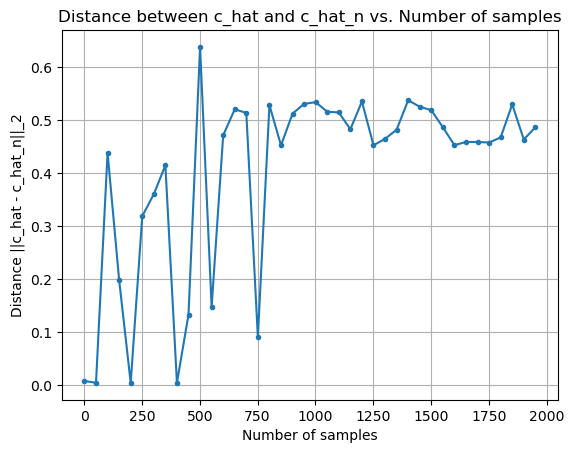

In [89]:
plt.plot(sample_sizes, distances, marker='.')
plt.xlabel('Number of samples')
plt.ylabel('Distance ||c_hat - c_hat_n||_2')
plt.title('Distance between c_hat and c_hat_n vs. Number of samples')
plt.grid(True)
plt.show()

<font color="green">Your answer:</font>

##References
[1] Timothy CY Chan, Taewoo Lee, and Daria Terekhov. Inverse optimization: Closed-form solutions, geometry, and goodness of fit. Management Science, 65(3):1115–1135, 2019.